In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = genfromtxt('./fashion-mnist_train.csv', delimiter=',')
test = genfromtxt('./fashion-mnist_test.csv', delimiter=',')

In [9]:
train = train[1:]
test = test[1:]

In [73]:
y_train = train[:,0]
X_train = train[:,1:]
y_test = test[:,0]
X_test = test[:,1:]

In [74]:
train_images = X_train.reshape(60000, 28, 28, 1)
test_images = X_test.reshape(10000, 28, 28, 1)

plot_train_images = X_train.reshape(60000, 28, 28)
plot_test_images = X_test.reshape(10000, 28, 28)


In [75]:
image_dict = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot',
}

Pullover


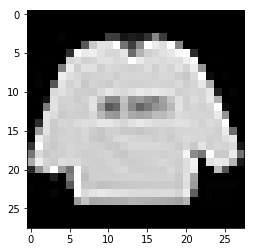

In [77]:
plt.gray()
plt.imshow(plot_train_images[0])
print(image_dict[y_train[0]])

In [78]:
normal_train_images = train_images/255.0
normal_test_images = test_images/255.0

In [90]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(13, 13, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(normal_train_images, y_train, epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total para

In [91]:
model.evaluate(normal_test_images, y_test)

10000/10000 [==============================] - 3s 263us/sample - loss: 0.2357 - acc: 0.9147


[0.23572073965072632, 0.9147]

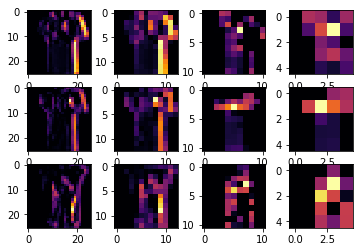

In [116]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=9
THIRD_IMAGE=35
CONVOLUTION_NUMBER = 35
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(normal_test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(normal_test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(normal_test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)